In [ ]:
%matplotlib widget
%load_ext autoreload
%autoreload 2
import os
import sys

sys.path.insert(0, os.getenv("HOME") + "/pycode/MscThesis/")
# sys.path.insert(0,r'C:\Users\coren\Documents\PhD\Code\AMFtrack')

import pandas as pd
from amftrack.util.sys import (
    get_dates_datetime,
    get_dirname,
    temp_path,
    get_data_info,
    update_plate_info,
    get_current_folders,
    get_folders_by_plate_id,
)

import ast
from amftrack.plotutil import plot_t_tp1
from scipy import sparse
from datetime import datetime

import pickle
import scipy.io as sio
from pymatreader import read_mat
from matplotlib import colors
import cv2
import imageio
import matplotlib.pyplot as plt
import numpy as np
from skimage.filters import frangi
from skimage import filters
from random import choice
import scipy.sparse
import os
from amftrack.pipeline.functions.image_processing.extract_graph import (
    from_sparse_to_graph,
    generate_nx_graph,
    sparse_to_doc,
)
from skimage.feature import hessian_matrix_det
from amftrack.pipeline.functions.image_processing.experiment_class_surf import (
    Experiment,
)
from amftrack.pipeline.paths.directory import (
    run_parallel_transfer,
    find_state,
    directory_scratch,
    directory_project,
    directory_archive,
)
import dropbox
from amftrack.transfer.functions.transfer import upload, zip_file
from subprocess import call
from tqdm.autonotebook import tqdm

In [ ]:
os.getenv("TEMP")

In [91]:
folders = get_current_folders("dropbox", True)

(array([7.400e+02, 1.000e+00, 0.000e+00, 0.000e+00, 1.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 1.000e+00, 1.000e+00, 0.000e+00, 0.000e+00,
        2.000e+00, 0.000e+00, 0.000e+00, 2.000e+00, 0.000e+00, 1.000e+00,
        2.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 2.000e+00,
        3.000e+01, 6.300e+01, 1.380e+02, 4.630e+02, 1.840e+02, 7.890e+02,
        1.490e+03, 1.084e+03, 4.980e+02, 7.570e+02, 8.970e+02, 6.230e+02,
        6.890e+02, 6.980e+02, 1.590e+02, 2.590e+02, 2.220e+02, 1.700e+02,
        1.007e+03, 1.050e+03, 1.800e+02, 6.000e+00, 4.000e+00, 8.000e+00,
        6.000e+00, 5.000e+00, 1.200e+01, 9.000e+00, 1.000e+01, 1.900e+01,
        1.900e+01, 2.500e+01, 1.100e+01, 3.000e+00, 6.000e+00, 6.000e+00]),
 array([2.2e-08, 0.02714991838333333, 0.05429981476666666,
        0.08144971114999999, 0.10859960753333332, 0.13574950391666663,
        0.16289940029999997, 0.1900492966833333, 0.21719919306666663,
        0.24434908944999995, 0.27149898583333326, 0.298648

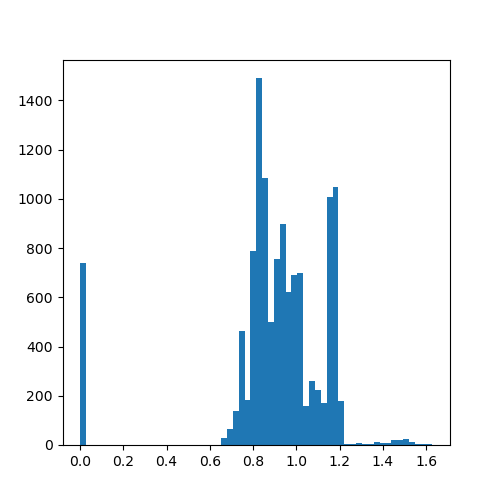

In [25]:
fig = plt.figure(figsize=(5, 5))
ax = fig.add_subplot(111)
ax.hist(all_folders_drop["size"], 60)

In [4]:
pd.read_json("/home/ipausers/bisot/temp/20210915_1602_Plate34.json", lines=True)

ValueError: Expected object or value

In [ ]:
##### %autoreload 2

directory = "/run/user/357100554/gvfs/smb-share:server=sun.amolf.nl,share=shimizu-data,user=bisot/home-folder/oyartegalvez/Drive_AMFtopology/PRINCE/"
directory = "/media/bisot/AMF_02/PRINCE/"
update_plate_info(directory)

all_folders = get_current_folders(directory)
# all_folders_drop = get_current_folders("dropbox")
all_folders_drop = get_current_folders("dropbox", True)
# folders = all_folders.loc[all_folders['strain']=="Agg"]
# folders = all_folders.loc[all_folders['Plate']==734]

In [16]:
directory = "/media/bisot/AMF_02/PRINCE/"
update_plate_info(directory)

analysed:   0%|          | 0/5724 [00:00<?, ?it/s]

In [17]:
all_folders = get_current_folders(directory)

In [97]:
all_folders_drop

,folder,size,change_date
0,20210930_2037_Plate40,0.965474,2022-03-15 11:35:52
1,20201007_1748_Plate04,0.879588,2022-03-15 11:33:25
2,20200903_2023_Plate19,0.83926,2022-03-15 11:30:14
3,20211024_1143_Plate27,1.025449,2022-03-15 11:27:13
4,20200921_0351_Plate05,0.869364,2022-03-15 11:24:48
...,...,...,...
11011,20201123_1801_Plate39,0.868594,2022-02-01 14:00:44
11012,20201122_1621_Plate40,0.872477,2022-02-01 14:00:42
11013,20201121_0421_Plate40,0.861213,2022-02-01 14:00:42
11014,20201120_1234_Plate40,0.855501,2022-02-01 14:00:41


In [ ]:
folders = all_folders

In [68]:
folders = all_folders.loc[
    all_folders["folder"].isin(all_folders_drop["folder"]) == False
]
folders2 = all_folders.loc[
    all_folders["folder"].isin(all_folders_drop["folder"]) == True
]

In [20]:
from_surf = all_folders_drop.loc[
    all_folders_drop["total_path"].str.contains("projects")
]

In [21]:
folders = all_folders.loc[all_folders["folder"].isin(from_surf["folder"]) == False]

In [97]:
folders = all_folders.loc[
    all_folders["folder"].isin(all_folders_drop["folder"]) == False
]
folders = folders.loc[folders["Temp"].isin(["25", "30to25"])]
# folders = folders.loc[folders['Temp'].isin(['25'])]

In [ ]:
real_drop_folder = all_folders_drop.loc[all_folders_drop["size"] > 0.6]
folders = all_folders.loc[
    all_folders["folder"].isin(real_drop_folder["folder"]) == False
]

In [9]:
folders = folders.loc[folders["folder"] == "20191210_1804_Plate07"]
folders

,total_path,Plate,PrincePos,root,strain,medium,split,Pbait,CrossDate,/Img/TileConfiguration.txt.registered,...,/Analysis/transform.mat,/Analysis/transform_corrupt.mat,/Analysis/skeleton_realigned_compressed.mat,/Analysis/nx_graph_pruned.p,/Analysis/nx_graph_pruned_width.p,/Analysis/nx_graph_pruned_labeled.p,date,folder,Temp,Temperature
16595,/media/bisot/AMF_02/PRINCE/20191210_1804_Plate07,65,07,'Carrot','A5','001P100N','Y','R','20191107',True,...,False,False,False,False,False,False,"10.12.2019, 18:04:",20191210_1804_Plate07,NaN,NaN


In [8]:
len(folders), len(all_folders_drop), len(all_folders)

(4139, 6164, 7649)

In [6]:
dir_drop = "prince_data"

In [ ]:
os.getenv("TEMP")

In [ ]:
run_info = folders.copy()
folder_list = list(run_info["folder"])
with tqdm(total=len(folder_list), desc="transferred") as pbar:
    for folder in folder_list:
        # print(folder)
        directory_name = folder
        run_info["unique_id"] = (
            run_info["Plate"].astype(str) + "_" + run_info["CrossDate"].astype(str)
        )
        line = run_info.loc[run_info["folder"] == directory_name]
        id_unique = line["unique_id"].iloc[0]

        path_snap = directory + directory_name
        API = str(np.load(os.getenv("HOME") + "/pycode/API_drop.npy"))

        path_zip = f'{os.getenv("TEMP")}/{directory_name}.zip'
        path_info = f'{os.getenv("TEMP")}/{directory_name}_info.json'
        line.to_json(path_info)
        zip_file(path_snap, path_zip)
        upload(
            API,
            path_zip,
            f"/{dir_drop}/{id_unique}/{directory_name}.zip",
            chunk_size=256 * 1024 * 1024,
        )
        upload(
            API,
            path_info,
            f"/{dir_drop}/{id_unique}/{directory_name}_info.json",
            chunk_size=256 * 1024 * 1024,
        )
        os.remove(path_info)
        os.remove(path_zip)
        pbar.update(1)